<a href="https://colab.research.google.com/github/VladimirAlkin/StockPredictionNetflix/blob/main/StockPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies 
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
# Load the Data
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [ ]:
# Store data to data frame
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-08,374.010010,378.390015,368.309998,371.119995,371.119995,6908900
1,2020-04-09,371.059998,372.100006,363.029999,370.720001,370.720001,7711300
2,2020-04-13,371.309998,400.510010,367.700012,396.720001,396.720001,11692900
3,2020-04-14,397.500000,417.820007,394.850006,413.549988,413.549988,11581000
4,2020-04-15,413.000000,434.980011,412.250000,426.750000,426.750000,13561200
5,2020-04-16,437.000000,449.519989,431.609985,439.170013,439.170013,16128700


In [ ]:
# Get number of trading days
df.shape

(251, 7)

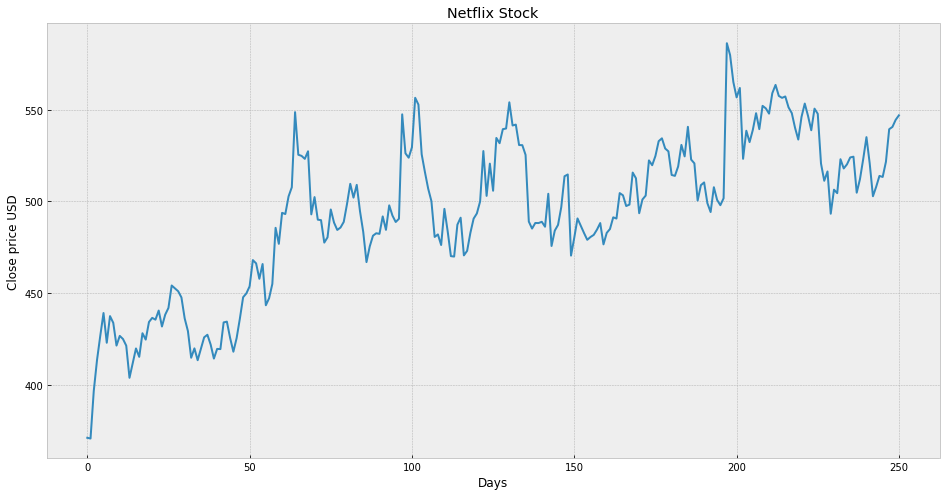

In [ ]:
# Close price data
plt.figure(figsize=(16,8))
plt.title('Netflix Stock')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(df['Close'])
plt.show()

In [ ]:
# Data Frame for only Close Price
df = df[['Close']]
df.head(4)

,Close
0,371.119995
1,370.720001
2,396.720001
3,413.549988


In [ ]:
#Crate a variable to predict 'x' days 
future_days = 25
#Create a new target data column shifted 'x' days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
247,539.419983,NaN
248,540.669983,NaN
249,544.530029,NaN
250,546.989990,NaN


In [ ]:
#Create the deature data set (X) and convert it to a numpy array and remox last 'x' rows(days)
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[371.119995]
 [370.720001]
 [396.720001]
 [413.549988]
 [426.75    ]
 [439.170013]
 [422.959991]
 [437.48999 ]
 [433.829987]
 [421.420013]
 [426.700012]
 [424.98999 ]
 [421.380005]
 [403.829987]
 [411.890015]
 [419.850006]
 [415.269989]
 [428.149994]
 [424.679993]
 [434.26001 ]
 [436.529999]
 [435.549988]
 [440.519989]
 [431.820007]
 [438.269989]
 [441.950012]
 [454.190002]
 [452.579987]
 [451.040009]
 [447.670013]
 [436.25    ]
 [429.320007]
 [414.769989]
 [419.890015]
 [413.440002]
 [419.730011]
 [425.920013]
 [427.309998]
 [421.970001]
 [414.329987]
 [419.600006]
 [419.48999 ]
 [434.049988]
 [434.480011]
 [425.559998]
 [418.070007]
 [425.5     ]
 [436.130005]
 [447.769989]
 [449.869995]
 [453.720001]
 [468.040009]
 [466.26001 ]
 [457.850006]
 [465.910004]
 [443.399994]
 [447.23999 ]
 [455.040009]
 [485.640015]
 [476.890015]
 [493.809998]
 [493.160004]
 [502.779999]
 [507.76001 ]
 [548.72998 ]
 [525.5     ]
 [524.880005]
 [523.26001 ]
 [527.390015]
 [492.98999 ]
 [502.410004]
 [490.

In [ ]:
#Create the target data set (y) convert it to a numpy array and get all of the target values except last 'x' rows (days)
y = np.array(df['Prediction'])[:-future_days]
print(y)

[441.950012 454.190002 452.579987 451.040009 447.670013 436.25
 429.320007 414.769989 419.890015 413.440002 419.730011 425.920013
 427.309998 421.970001 414.329987 419.600006 419.48999  434.049988
 434.480011 425.559998 418.070007 425.5      436.130005 447.769989
 449.869995 453.720001 468.040009 466.26001  457.850006 465.910004
 443.399994 447.23999  455.040009 485.640015 476.890015 493.809998
 493.160004 502.779999 507.76001  548.72998  525.5      524.880005
 523.26001  527.390015 492.98999  502.410004 490.100006 489.820007
 477.579987 480.450012 495.649994 488.51001  484.480011 485.799988
 488.880005 498.619995 509.640015 502.109985 509.079987 494.730011
 483.380005 466.929993 475.470001 481.329987 482.679993 482.350006
 491.869995 484.529999 497.899994 492.309998 488.809998 490.579987
 547.530029 526.27002  523.890015 529.559998 556.549988 552.840027
 525.75     516.049988 507.019989 500.190002 480.670013 482.029999
 476.26001  495.98999  483.859985 470.200012 469.959991 487.350006

In [ ]:
#Split the data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
#Create the models
#Create the decesion tree regression model
tree = DecisionTreeRegressor().fit(X_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
#Get the last 'x' rows of the future data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[561.929993],
       [523.280029],
       [538.599976],
       [532.390015],
       [539.039978],
       [548.159973],
       [539.450012],
       [552.159973],
       [550.789978],
       [547.919983],
       [559.070007],
       [563.590027],
       [557.590027],
       [556.52002 ],
       [557.280029],
       [551.340027],
       [548.219971],
       [540.219971],
       [533.780029],
       [546.150024],
       [553.409973],
       [546.700012],
       [538.849976],
       [550.640015],
       [547.820007]])

In [ ]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction,'\n')
print('*'*50, '\n')
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[524.440002 511.290009 516.390015 493.329987 506.440002 504.540009
 482.839996 518.02002  520.809998 524.030029 524.440002 550.640015
 512.179993 523.109985 535.090027 520.809998 502.859985 508.049988
 513.950012 513.390015 521.659973 539.419983 540.669983 520.809998
 546.98999 ] 

************************************************** 

[535.6599263  517.51093747 524.70477462 521.78874312 524.91138779
 529.19389339 525.10392878 531.07218635 530.42887336 529.08120051
 534.31695341 536.43943385 533.62199441 533.11954775 533.47642764
 530.68716165 529.22206685 525.46548093 522.44145649 528.25007513
 531.65915291 528.50833478 524.82216793 530.35845475 529.03425446]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


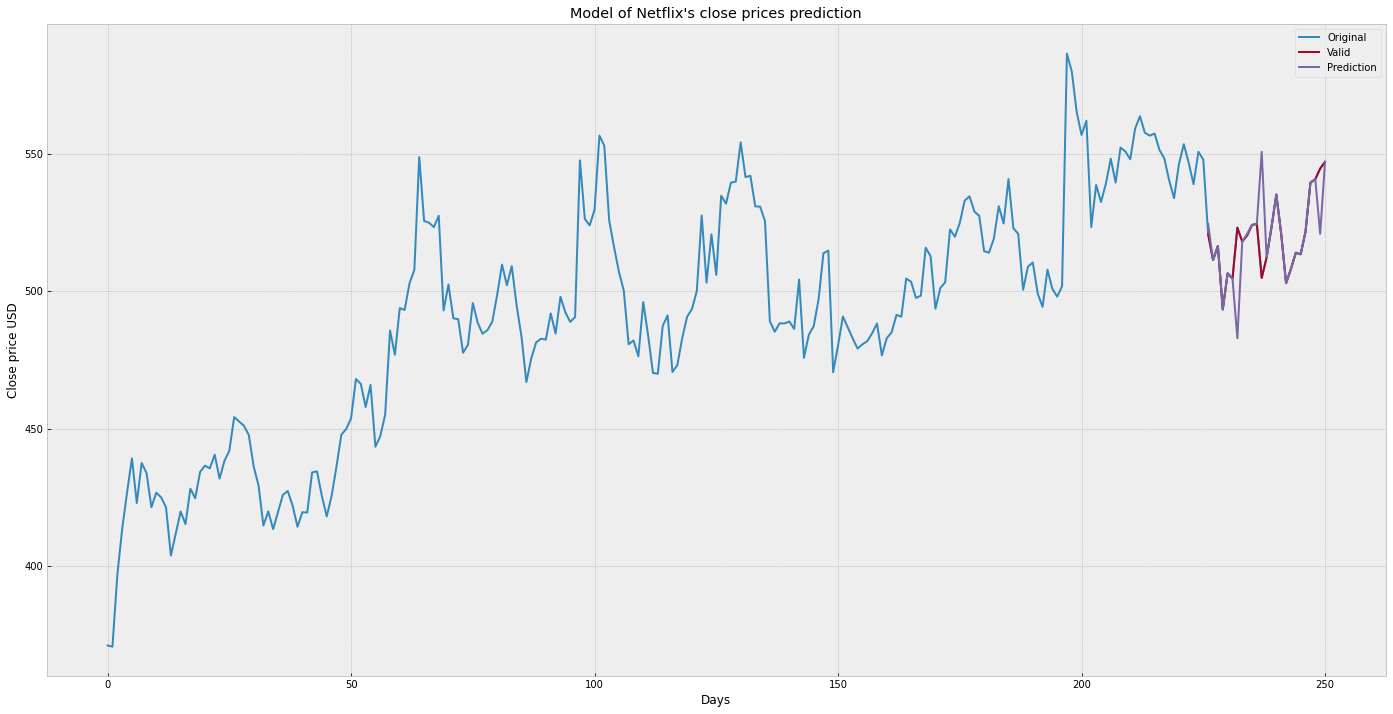

In [ ]:
#Visiualize data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(24,12))
plt.title("Model of Netflix's close prices prediction")
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original', 'Valid', 'Prediction'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


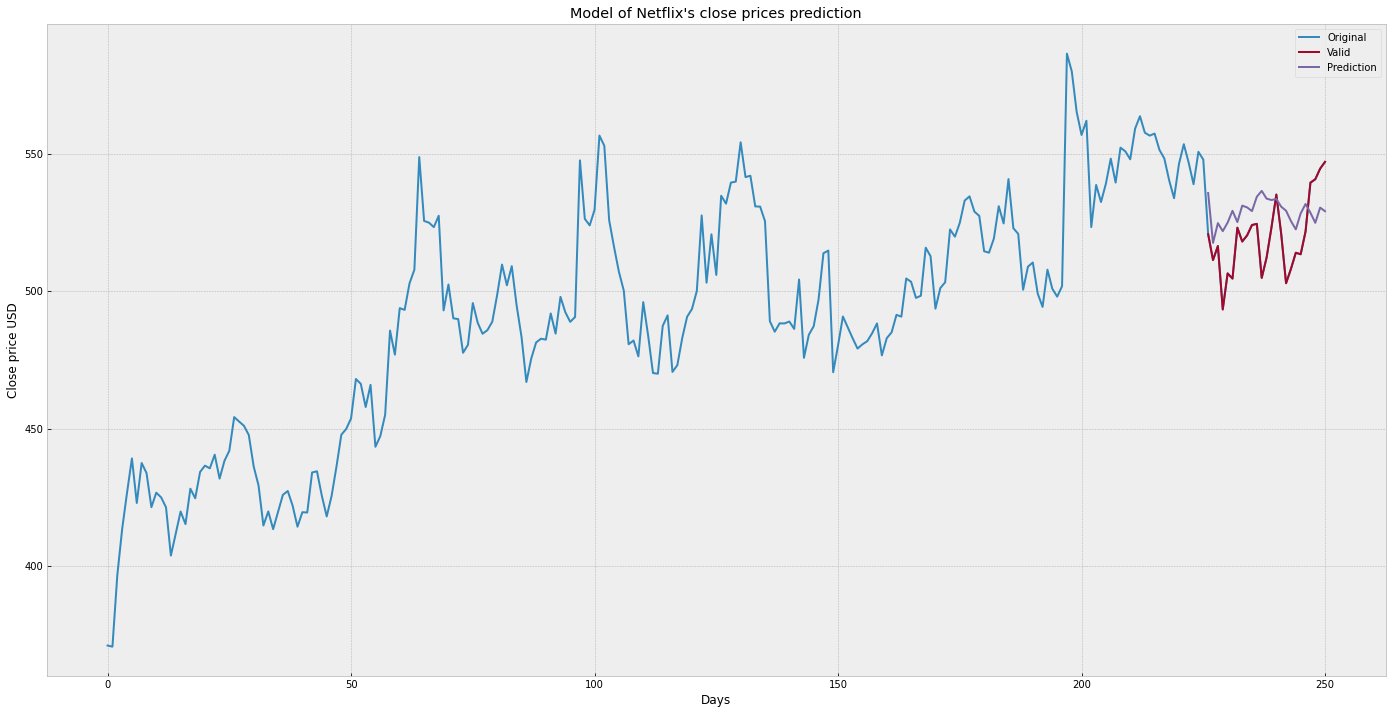

In [ ]:
#Visiualize data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(24,12))
plt.title("Model of Netflix's close prices prediction")
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original', 'Valid', 'Prediction'])
plt.show()